*Теоретический материал:* https://youtu.be/bNwYTby3wDk?t=69

# Импорт + функции


In [ ]:
import random as random # Импортируем библиотку генерации случайных значений
import numpy as np # Импортируем библиотеку numpy
import matplotlib.pyplot as plt # Импортируем модуль pyplot библиотеки matplotlib
import matplotlib.colors as colors # Импортируем модуль colors библиотеки matplotlib
import pandas as pd

# Статический вывод графики (графики отображаются в той ячейке, в которой используется plt.show())
%matplotlib inline 

In [ ]:
'''
    Функция получения выжившей популяции
        Входные параметры:
        - popul - наша популяция
        - val - текущие значения
        - nsurv - количество выживших
        - reverse - указываем требуемую операцию поиска результата: максимизация или минимизация
'''
def getSurvPopul(
        popul,
        val,
        nsurv,
        reverse
        ):
    newpopul = [] # Двумерный массив для новой популяции
    sval = sorted(val, reverse=reverse) # Сортируем зачения в val в зависимости от параметра reverse    
    for i in range(nsurv): # Проходимся по циклу nsurv-раз (в итоге в newpopul запишется nsurv-лучших показателей)
        index = val.index(sval[i]) # Получаем индекс i-того элемента sval в исходном массиве val
        newpopul.append(popul[index]) # В новую папуляцию добавляем элемент из текущей популяции с найденным индексом
    return newpopul, sval # Возвращаем новую популяцию (из nsurv элементов) и сортированный список

'''
    Функция получения родителей
        Входные параметры:
        - curr_popul - текущая популяция
        - nsurv - количество выживших
'''
def getParents(
        curr_popul,
        nsurv
        ):   
    indexp1 = random.randint(0, nsurv - 1) # Случайный индекс первого родителя в диапазоне от 0 до nsurv - 1
    indexp2 = random.randint(0, nsurv - 1) # Случайный индекс второго родителя в диапазоне от 0 до nsurv - 1    
    botp1 = curr_popul[indexp1] # Получаем первого бота-родителя по indexp1
    botp2 = curr_popul[indexp2] # Получаем второго бота-родителя по indexp2    
    return botp1, botp2 # Возвращаем обоих полученных ботов

'''
    Функция смешивания (кроссинговера) двух родителей
        Входные параметры:
        - botp1 - первый бот-родитель
        - botp2 - второй бот-родитель
        - j - номер компонента бота
'''
def crossPointFrom2Parents(
        botp1,
        botp2, 
        j
        ):
    pindex = random.random() # Получаем случайное число в диапазоне от 0 до 1
    
    # Если pindex меньше 0.5, то берем значения от первого бота, иначе от второго
    if pindex < 0.5:
        x = botp1[j]
    else:
        x = botp2[j]
    return x # Возвращаем значние бота

In [ ]:
def min_func_light(n = 100, nsurv = 20, l = 12, epohs = 500,  mut = 0.25, limit = 0, printout = 1):

  nnew = n - nsurv # Количество новых (столько новых ботов создается)
  limit_done = 0
  popul = [] # Двумерный массив популяции, размерностью [n, l]. 100 ботов по 8 компонентов каждый
  val = [] # Одномерный массив значений этих ботов

  for i in range(n): # Проходим по всей длине популяции
      popul.append([]) # Создаем пустого бота
      for j in range(l): # Проходим по всей длине бота
          popul[i].append(random.random()) # В каждый компонент бота записываем рандомное значение 

  for it in range(epohs): # Пробегаемся по всем эпохам
      val = [] # Создаем пустой список для значений ботов

      for i in range(n): # Проходим по всей длине популяции
          bot = popul[i] # Берем очередного бота
      
          # в каждом боте должны быть закодированы парные значения x-y
          x = bot[0] + 5*bot[1] + 10*bot[2] + 25*bot[3] # первые 4 значения отводим для Х
          y = bot[4] + 5*bot[5] + 10*bot[6] + 25*bot[7] # вторые 4 значения - для Y
          z = bot[8] + 5*bot[9] + 10*bot[10] + 25*bot[11] # оставшиеся 4 значения - для Z
          f = x**2/y + z*(12-z) + 5*y/x
          if abs(f) < limit:
            limit_done = 1
            return it, limit_done
          val.append(abs(f)) # добавляем модуль значения в список на эпоху
                            # в этой задаче будем искать 0 функции

      newpopul, sval = getSurvPopul(popul, val, nsurv, 0) # Получаем новую популяцию и сортированный список значнией
      if printout:
        print(it, " ", [round(s,8) for s in sval[0:5]]) # Выводим 5 лучших ботов
  
      for i in range(nnew): # Проходимся в цикле nnew-раз 
          botp1, botp2 = getParents(newpopul, nsurv) # Из newpopul(новой популяции) получаем двух случайных родителей-ботов
          newbot = [] # Массив для нового бота
          # проходимся по длине бота и осуществляем смешивание/скрещивание от родителей
          for j in range(l): # Проходим по всей длине бота
              x = crossPointFrom2Parents(botp1, botp2, j) # Получаем значение для j-ого компонента бота
              x += mut*(2*random.random() - 1.0) #Добавялем к значению бота случайную величину, зависящую от коэфециента мутации        
              newbot.append(x) # Добавялем новое значение в бота      
          newpopul.append(newbot) # Добавляем бота в новую популяцию 
          #(таким образом к nsurv-лучших ботов предыдующей популяции добавится nnew-новых ботов)
      
      popul = newpopul
  return popul, limit_done


In [ ]:
popeul, _ = min_func_light()

0   [2.3955426, 3.37917664, 3.4847392, 10.70858246, 11.31929596]
1   [0.95491225, 1.08979104, 2.3955426, 3.04077543, 3.05654392]
2   [0.1158395, 0.95491225, 1.08979104, 2.3955426, 2.9049939]
3   [0.1158395, 0.41333348, 0.95491225, 1.08979104, 1.28844789]
4   [0.1158395, 0.41333348, 0.94963606, 0.95157997, 0.95491225]
5   [0.1158395, 0.41333348, 0.84035937, 0.94963606, 0.95157997]
6   [0.1158395, 0.41333348, 0.84035937, 0.94963606, 0.95157997]
7   [0.1158395, 0.41333348, 0.84035937, 0.94963606, 0.95157997]
8   [0.1158395, 0.41333348, 0.84035937, 0.94963606, 0.95157997]
9   [0.1158395, 0.41333348, 0.45641769, 0.84035937, 0.94963606]
10   [0.1158395, 0.41333348, 0.45641769, 0.84035937, 0.94963606]
11   [0.1158395, 0.41333348, 0.45641769, 0.84035937, 0.94963606]
12   [0.1158395, 0.41333348, 0.45641769, 0.84035937, 0.94963606]
13   [0.1158395, 0.41333348, 0.45641769, 0.84035937, 0.94963606]
14   [0.1158395, 0.41333348, 0.45641769, 0.81097196, 0.84035937]
15   [0.1158395, 0.41333348, 0.45641

# LIGHT


## 1

In [ ]:
popul = min_func_light()

0   [0.79149367, 4.93469312, 12.03653337, 14.72933865, 15.31109352]
1   [0.79149367, 0.82073065, 4.93469312, 5.64829756, 8.90099137]
2   [0.18737381, 0.79149367, 0.82073065, 2.55226143, 3.47210621]
3   [0.18737381, 0.79149367, 0.82073065, 1.73501452, 2.55226143]
4   [0.18737381, 0.28083504, 0.79149367, 0.82073065, 1.73501452]
5   [0.18737381, 0.28083504, 0.79149367, 0.82073065, 1.48531263]
6   [0.18737381, 0.28083504, 0.79149367, 0.82073065, 1.48531263]
7   [0.18737381, 0.28083504, 0.79149367, 0.82073065, 1.48531263]
8   [0.18737381, 0.28083504, 0.79149367, 0.82073065, 1.48531263]
9   [0.18737381, 0.28083504, 0.79149367, 0.82073065, 1.48531263]
10   [0.18737381, 0.28083504, 0.79149367, 0.82073065, 1.01529034]
11   [0.18737381, 0.28083504, 0.79149367, 0.82073065, 0.84950861]
12   [0.18737381, 0.28083504, 0.79149367, 0.82073065, 0.84950861]
13   [0.18737381, 0.27828772, 0.28083504, 0.79149367, 0.82073065]
14   [0.18737381, 0.27828772, 0.28083504, 0.79149367, 0.82073065]
15   [0.18737381,

In [ ]:
bot = popul[0] # Берем первого (лучшего) бота в финальной популяции
x = bot[0] + 5*bot[1] + 10*bot[2] + 25*bot[3] # Считаем x
y = bot[4] + 5*bot[5] + 10*bot[6] + 25*bot[7] # Считаем y 
z = bot[8] + 5*bot[9] + 10*bot[10] + 25*bot[11]  # Считаем z
f = x**2/y + z*(12-z) + 5*y/x # Считаем значение функции
print(bot) # Выводим бота (12 компонент)
print("x =",x, "y =", y, 'z =', z) # Выводим значения x и y
print("f =",f) # Выводим значение функции (которое должно быть максимально близко к 0 по условию задачи)

[0.5033857417239851, 0.34445260362663815, -0.03591718083887013, 0.32711200722692924, 0.0382007021489803, 1.0310226000560627, 0.6108535872375753, 0.3811872671671758, 0.8700607410343602, 0.4448208675521883, 0.05261847099597816, 0.3814375023084231]
x = 10.044277132141705 y = 20.831531253984444 z = 13.15628734646566
f = 0.00042138531576441096


## 2

In [ ]:
columns = ['начальное значение', 'популяция_50','популяция_150','популяция_200',
           'мутация_0.1','мутация_0.5','мутация_0.7',
           'выживших_10','выживших_40','выживших_60']
results = []
limit = 0.01
limit_done = 0
while not limit_done:
  it, limit_done= min_func_light(limit=limit, printout=0)
results.append(it)

limit_done = 0
while not limit_done:
  it, limit_done= min_func_light(n=50, limit=limit, printout=0)
results.append(it)

limit_done = 0
while not limit_done:
  it, limit_done= min_func_light(n=150, limit=limit, printout=0)
results.append(it)

limit_done = 0
while not limit_done:
  it, limit_done= min_func_light(n=200, limit=limit, printout=0)
results.append(it)

limit_done = 0
while not limit_done:
  it, limit_done= min_func_light(mut=0.1, limit=limit, printout=0)
results.append(it)

limit_done = 0
while not limit_done:
  it, limit_done= min_func_light(mut=0.5, limit=limit, printout=0)
results.append(it)

limit_done = 0
while not limit_done:
  it, limit_done= min_func_light(mut=0.7, limit=limit, printout=0)
results.append(it)

limit_done = 0
while not limit_done:
  it, limit_done= min_func_light(nsurv=10, limit=limit, printout=0)
results.append(it)

limit_done = 0
while not limit_done:
  it, limit_done= min_func_light(nsurv=40, limit=limit, printout=0)
results.append(it)

limit_done = 0
while not limit_done:
  it, limit_done= min_func_light(nsurv=60, limit=limit, printout=0)
results.append(it)

In [ ]:

results_table = pd.DataFrame(results, index=columns, columns=['эпох'])
results_table

,эпох
начальное значение,95
популяция_50,434
популяция_150,45
популяция_200,6
мутация_0.1,173
мутация_0.5,261
мутация_0.7,35
выживших_10,414
выживших_40,118
выживших_60,327


## 3

In [ ]:
train = np.array([1, 12, 72, 4, 55, 1]) # Вместимость каждого поезда

size = np.array([1, 1, 1, 1, 4, 3, 3, 3, 1, 27, 31, 7, 7, 11, 22, 7, 7, 8]) 


print(train.sum())
print(size.sum())

print(train.shape)
print(size.shape)

145
145
(6,)
(18,)


In [ ]:
size

array([ 1,  1,  1,  1,  4,  3,  3,  3,  1, 27, 31,  7,  7, 11, 22,  7,  7,
        8])

0   158.72   [38, 84, 84, 86, 90, 94, 100, 102, 102, 104, 104, 104, 106, 108, 108, 114, 116, 118, 118, 122]
1   118.16   [22, 26, 32, 38, 44, 54, 66, 72, 72, 78, 78, 82, 82, 84, 84, 84, 86, 86, 88, 88]
2   102.04   [22, 26, 30, 32, 38, 40, 40, 40, 44, 44, 48, 54, 56, 58, 60, 60, 66, 70, 72, 72]
3   94.22   [22, 26, 30, 32, 32, 36, 36, 38, 40, 40, 40, 40, 42, 44, 44, 44, 46, 48, 52, 54]
4   84.42   [22, 22, 26, 26, 26, 28, 30, 32, 32, 36, 36, 36, 38, 38, 38, 38, 40, 40, 40, 40]
5   82.96   [20, 22, 22, 26, 26, 26, 26, 28, 30, 32, 32, 36, 36, 36, 36, 38, 38, 38, 38, 38]
6   71.26   [10, 14, 18, 20, 22, 22, 22, 26, 26, 26, 26, 26, 28, 28, 30, 30, 30, 32, 32, 34]
7   74.92   [10, 14, 18, 18, 20, 22, 22, 22, 26, 26, 26, 26, 26, 28, 28, 28, 28, 30, 30, 30]
8   71.38   [10, 14, 16, 18, 18, 20, 22, 22, 22, 22, 24, 24, 26, 26, 26, 26, 26, 26, 26, 26]
9   73.8   [10, 14, 16, 16, 16, 18, 18, 18, 20, 22, 22, 22, 22, 24, 24, 24, 24, 26, 26, 26]
10   68.96   [10, 14, 16, 16, 16, 18, 18, 18, 20, 22, 

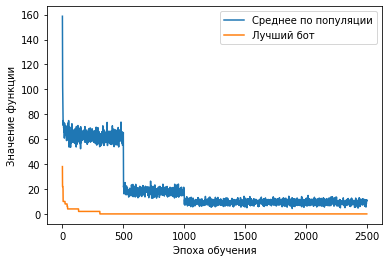

In [ ]:
n = 100 # Общее число ботов
nsurv = 20 # Количество выживших (столько лучших переходит в новую популяцию)
nnew = n-nsurv # Количество новых (столько новых ботов создается)
epohs = 2500 # количество эпох
mut = 0.4 # коэфициент мутаций

# Длина бота(количество единиц груза) (Каждый компонент указывает индекс поезда, в котором этот груз будет размещен)
l = size.shape[0] 
trains = train.shape[0] # Количество поездов

popul = [] # Двумерный массив популяции, размерностью [n, l].
val = [] # Одномерный массив значений этих ботов

plotmeanval = [] # сюда будут заносится значения для графика по среднему значению
plotminval = [] # сюда будут заносится значения для графика по минимальному значению
 
for i in range(n): # Проходим по всей длине популяции
    popul.append([]) # Создаем пустого бота
    for j in range(l): # Проходим по всей длине бота
        
        # В каждый компонент бота записываем рандомное значение в диапазоне от 0 до количества поездов
        popul[i].append(random.randint(0, trains - 1)) 

for it in range(epohs): # Проходим по всем эпохам

    if (it == 500): # Меняем коэфициент мутации после 500-ой эпохи
        mut = 0.1   
    if (it == 1000): # Меняем коэфициет мутации после 1000-ой эпохи
        mut = 0.05  

    val = [] # Создаем пустой список для значений ботов
    for i in range(n): # Проходим по всей популяции
        bot = popul[i] # Берем очередного бота
        trainfill = np.array([0, 0, 0, 0, 0, 0]) # Массив, хранящий заполняемость каждого поезда
        for j in range(l): # Проходим по всей длине бота
            trainfill[bot[j]] += size[j] # Увеличиваем заполненность bot[j]-го поезда на size[j]          
        
        f = 0 # Обнуляем ошибку i-го бота 
        for t in range(trains): # Проходим по всем поездам
            # Увеличиваем ошибку i-го бота на модуль разницы между реальной вместимостью поезда 
            # и вместимостью, который посчитал бот
            f += abs(train[t] - trainfill[t]) 
        val.append(f) # Добавляем в val значение ошибки для i-го бота    
    
    newpopul, sval = getSurvPopul(popul, val, nsurv, 0) # Получаем новую популяцию и сортированный список значнией
    print(it, " ", sum(val) / len(val), " ", sval[0:20])  # Выводим среднее значение и 20 лучших ботов  
    plotmeanval.append(sum(val) / len(val)) # Добавляем среднее значение в список
    plotminval.append(sval[0]) # Добавляем минимальное значение в список
    
    for i in range(nnew): # Проходимся в цикле nnew-раз
        botp1, botp2 = getParents(newpopul, nsurv) # Из newpopul(новой популяции) получаем двух случайных родителей-ботов
        newbot = [] # Массив для нового бота
    
        for j in range(l): # Проходим по всей длине бота
            x = crossPointFrom2Parents(botp1, botp2, j) # Получаем значение для j-ого компонента бота
        
            # С вероятностью mut сбрасываем значение j-ого компонента бота на случайное
            if (random.random() < mut):
                x = random.randint(0, trains - 1)        
            newbot.append(x) # Добавляем новое значение в бота      
        newpopul.append(newbot) # Добавляем бота в новую популяцию    
    popul = newpopul # Записываем в popul новую посчитанную популяцию

# построение графиков 
plt.plot(plotmeanval, 
         label='Среднее по популяции')
plt.plot(plotminval, 
         label='Лучший бот')
plt.xlabel('Эпоха обучения')
plt.ylabel('Значение функции')
plt.legend()
plt.show()

In [ ]:
# Выводим 20 лучших ботов
for i in range(20):
    print(popul[i])

[0, 3, 1, 5, 2, 4, 3, 4, 2, 4, 2, 2, 2, 1, 2, 4, 4, 4]
[0, 3, 1, 5, 2, 4, 3, 4, 2, 4, 2, 2, 2, 1, 2, 4, 4, 4]
[0, 3, 1, 5, 2, 4, 3, 4, 2, 4, 2, 2, 2, 1, 2, 4, 4, 4]
[0, 3, 1, 5, 2, 4, 3, 4, 2, 4, 2, 2, 2, 1, 2, 4, 4, 4]
[0, 3, 1, 5, 2, 4, 3, 4, 2, 4, 2, 2, 2, 1, 2, 4, 4, 4]
[0, 3, 1, 5, 2, 4, 3, 4, 2, 4, 2, 2, 2, 1, 2, 4, 4, 4]
[0, 3, 1, 5, 2, 4, 3, 4, 2, 4, 2, 2, 2, 1, 2, 4, 4, 4]
[0, 3, 1, 5, 2, 4, 3, 4, 2, 4, 2, 2, 2, 1, 2, 4, 4, 4]
[0, 3, 1, 5, 2, 4, 3, 4, 2, 4, 2, 2, 2, 1, 2, 4, 4, 4]
[0, 3, 1, 5, 2, 4, 3, 4, 2, 4, 2, 2, 2, 1, 2, 4, 4, 4]
[0, 3, 1, 5, 2, 4, 3, 4, 2, 4, 2, 2, 2, 1, 2, 4, 4, 4]
[0, 3, 1, 5, 2, 4, 3, 4, 2, 4, 2, 2, 2, 1, 2, 4, 4, 4]
[0, 3, 1, 5, 2, 4, 3, 4, 2, 4, 2, 2, 2, 1, 2, 4, 4, 4]
[0, 3, 1, 5, 2, 4, 3, 4, 2, 4, 2, 2, 2, 1, 2, 4, 4, 4]
[0, 3, 1, 5, 2, 4, 3, 4, 2, 4, 2, 2, 2, 1, 2, 4, 4, 4]
[0, 3, 1, 5, 2, 4, 3, 4, 2, 4, 2, 2, 2, 1, 2, 4, 4, 4]
[0, 3, 1, 5, 2, 4, 3, 4, 2, 4, 2, 2, 2, 1, 2, 4, 4, 4]
[0, 3, 1, 5, 2, 4, 3, 4, 2, 4, 2, 2, 2, 1, 2, 4, 4, 4]
[0, 3, 1, 

In [ ]:
bot = popul[0] # Берем лучшее значение в популяции
print ('Значения лучшего бота:', bot) # Выводим значения бота (каждый параметр хранит номер поезда, в который следует разместить груз)

trainfill = np.zeros(trains, dtype = 'int32') # Массив заполненности поездов
for j in range(l): # Проходим по всей длине бота
    trainfill[bot[j]] += size[j] # Увеличиваем заполненность bot[j]-ого поезда на size[j]

print ('Вместимость поездов по боту:', trainfill) # Выводим заполненность поездов в соответствии с ботом
print ('Реальная вместимость поездов:', train) # Выводим реальную вместимость поездов

Значения лучшего бота: [0, 3, 1, 5, 2, 4, 3, 4, 2, 4, 2, 2, 2, 1, 2, 4, 4, 4]
Вместимость поездов по боту: [ 1 12 72  4 55  1]
Реальная вместимость поездов: [ 1 12 72  4 55  1]


## 4

In [ ]:
train = np.array([10, 10, 10, 12, 12, 12]) # Вместимость каждого поезда

size = np.array([1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 5, 5, 6, 6]) 


print(train.sum())
print(size.sum())

print(train.shape)
print(size.shape)

66
54
(6,)
(18,)


In [ ]:
size

array([1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 5, 5, 6, 6])

0   25.58   [10.0, 12.0, 12.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 16.0, 16.0, 16.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0]
1   20.9   [8.0, 10.0, 10.0, 10.0, 10.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0]
2   20.4   [6.0, 6.0, 8.0, 10.0, 10.0, 10.0, 10.0, 10.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 14.0, 14.0, 14.0]
3   19.84   [6.0, 6.0, 8.0, 8.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0]
4   19.86   [6.0, 6.0, 6.0, 6.0, 8.0, 8.0, 8.0, 8.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 12.0, 12.0, 12.0, 12.0, 12.0]
5   20.58   [6.0, 6.0, 6.0, 6.0, 6.0, 8.0, 8.0, 8.0, 8.0, 8.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 12.0]
6   19.98   [6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 8.0, 8.0, 8.0, 8.0, 8.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0]
7   19.38   [6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 8.0, 8.0, 8.0, 8.0, 8.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0,

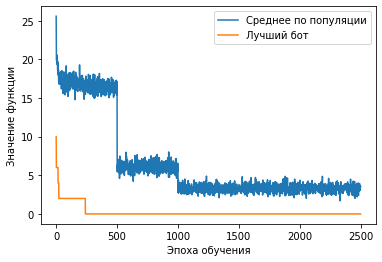

In [ ]:
n = 100 # Общее число ботов
nsurv = 20 # Количество выживших (столько лучших переходит в новую популяцию)
nnew = n-nsurv # Количество новых (столько новых ботов создается)
epohs = 2500 # количество эпох
mut = 0.4 # коэфициент мутаций

# Длина бота(количество единиц груза) (Каждый компонент указывает индекс поезда, в котором этот груз будет размещен)
l = size.shape[0] 
trains = train.shape[0] # Количество поездов

popul = [] # Двумерный массив популяции, размерностью [n, l].
val = [] # Одномерный массив значений этих ботов

plotmeanval = [] # сюда будут заносится значения для графика по среднему значению
plotminval = [] # сюда будут заносится значения для графика по минимальному значению
 
for i in range(n): # Проходим по всей длине популяции
    popul.append([]) # Создаем пустого бота
    for j in range(l): # Проходим по всей длине бота
        
        # В каждый компонент бота записываем рандомное значение в диапазоне от 0 до количества поездов
        popul[i].append(random.randint(0, trains - 1)) 

for it in range(epohs): # Проходим по всем эпохам

    if (it == 500): # Меняем коэфициент мутации после 500-ой эпохи
        mut = 0.1   
    if (it == 1000): # Меняем коэфициет мутации после 1000-ой эпохи
        mut = 0.05  

    val = [] # Создаем пустой список для значений ботов
    for i in range(n): # Проходим по всей популяции
        bot = popul[i] # Берем очередного бота
        trainfill = np.array([0, 0, 0, 0, 0, 0]) # Массив, хранящий заполняемость каждого поезда
        for j in range(l): # Проходим по всей длине бота
            trainfill[bot[j]] += size[j] # Увеличиваем заполненность bot[j]-го поезда на size[j]          
        
        f = 0 # Обнуляем ошибку i-го бота 
        for t in range(trains): # Проходим по всем поездам
            # Увеличиваем ошибку i-го бота на модуль разницы между реальной вместимостью поезда 
            # и вместимостью, который посчитал бот
            f += abs(trainfill.mean() - trainfill[t]) 
        val.append(f) # Добавляем в val значение ошибки для i-го бота    
    
    newpopul, sval = getSurvPopul(popul, val, nsurv, 0) # Получаем новую популяцию и сортированный список значнией
    print(it, " ", sum(val) / len(val), " ", sval[0:20])  # Выводим среднее значение и 20 лучших ботов  
    plotmeanval.append(sum(val) / len(val)) # Добавляем среднее значение в список
    plotminval.append(sval[0]) # Добавляем минимальное значение в список
    
    for i in range(nnew): # Проходимся в цикле nnew-раз
        botp1, botp2 = getParents(newpopul, nsurv) # Из newpopul(новой популяции) получаем двух случайных родителей-ботов
        newbot = [] # Массив для нового бота
    
        for j in range(l): # Проходим по всей длине бота
            x = crossPointFrom2Parents(botp1, botp2, j) # Получаем значение для j-ого компонента бота
        
            # С вероятностью mut сбрасываем значение j-ого компонента бота на случайное
            if (random.random() < mut):
                x = random.randint(0, trains - 1)        
            newbot.append(x) # Добавляем новое значение в бота      
        newpopul.append(newbot) # Добавляем бота в новую популяцию    
    popul = newpopul # Записываем в popul новую посчитанную популяцию

# построение графиков 
plt.plot(plotmeanval, 
         label='Среднее по популяции')
plt.plot(plotminval, 
         label='Лучший бот')
plt.xlabel('Эпоха обучения')
plt.ylabel('Значение функции')
plt.legend()
plt.show()

In [ ]:
# Выводим 20 лучших ботов
for i in range(20):
    print(popul[i])

[3, 1, 1, 3, 1, 4, 4, 1, 3, 1, 2, 5, 0, 3, 4, 0, 5, 2]
[3, 1, 1, 3, 1, 4, 4, 1, 3, 1, 2, 5, 0, 3, 4, 0, 5, 2]
[3, 1, 1, 3, 1, 4, 4, 1, 3, 1, 2, 5, 0, 3, 4, 0, 5, 2]
[3, 1, 1, 3, 1, 4, 4, 1, 3, 1, 2, 5, 0, 3, 4, 0, 5, 2]
[3, 1, 1, 3, 1, 4, 4, 1, 3, 1, 2, 5, 0, 3, 4, 0, 5, 2]
[3, 1, 1, 3, 1, 4, 4, 1, 3, 1, 2, 5, 0, 3, 4, 0, 5, 2]
[3, 1, 1, 3, 1, 4, 4, 1, 3, 1, 2, 5, 0, 3, 4, 0, 5, 2]
[3, 1, 1, 3, 1, 4, 4, 1, 3, 1, 2, 5, 0, 3, 4, 0, 5, 2]
[3, 1, 1, 3, 1, 4, 4, 1, 3, 1, 2, 5, 0, 3, 4, 0, 5, 2]
[3, 1, 1, 3, 1, 4, 4, 1, 3, 1, 2, 5, 0, 3, 4, 0, 5, 2]
[3, 1, 1, 3, 1, 4, 4, 1, 3, 1, 2, 5, 0, 3, 4, 0, 5, 2]
[3, 1, 1, 3, 1, 4, 4, 1, 3, 1, 2, 5, 0, 3, 4, 0, 5, 2]
[3, 1, 1, 3, 1, 4, 4, 1, 3, 1, 2, 5, 0, 3, 4, 0, 5, 2]
[3, 1, 1, 3, 1, 4, 4, 1, 3, 1, 2, 5, 0, 3, 4, 0, 5, 2]
[3, 1, 1, 3, 1, 4, 4, 1, 3, 1, 2, 5, 0, 3, 4, 0, 5, 2]
[3, 1, 1, 3, 1, 4, 4, 1, 3, 1, 2, 5, 0, 3, 4, 0, 5, 2]
[3, 1, 1, 3, 1, 4, 4, 1, 3, 1, 2, 5, 0, 3, 4, 0, 5, 2]
[3, 1, 1, 3, 1, 4, 4, 1, 3, 1, 2, 5, 0, 3, 4, 0, 5, 2]
[3, 1, 1, 

In [ ]:
bot = popul[0] # Берем лучшее значение в популяции
print ('Значения лучшего бота:', bot) # Выводим значения бота (каждый параметр хранит номер поезда, в который следует разместить груз)

trainfill = np.zeros(trains, dtype = 'int32') # Массив заполненности поездов
for j in range(l): # Проходим по всей длине бота
    trainfill[bot[j]] += size[j] # Увеличиваем заполненность bot[j]-ого поезда на size[j]

print ('Вместимость поездов по боту:', trainfill) # Выводим заполненность поездов в соответствии с ботом
print ('Реальная вместимость поездов:', train) # Выводим реальную вместимость поездов

Значения лучшего бота: [3, 1, 1, 3, 1, 4, 4, 1, 3, 1, 2, 5, 0, 3, 4, 0, 5, 2]
Вместимость поездов по боту: [9 9 9 9 9 9]
Реальная вместимость поездов: [10 10 10 12 12 12]


# PRO -2 

Взял данный кейс из интереса, так как задача по кластеризации по моим ощущениям должна решаться не ГА. А здесь и задача интересней и сложней.

В итоге столкнулся с острой нехваткой памяти в колабе: так как игра возвращает не просто координаты, а полностью все изображение поля.
Для оптимизации пришлось уйти от списоков и переделать все на numpy-массивы, а также добавить удаление ненужных переменных.
Однако все-равно памяти не хватало. Пришлось обучаться на популяции из 5 ботов и максимум на двух эпохах. Понятно, что такого обучения для полноценного решения задачи не хватило. Но все же считаю полученные результаты положительными: в максимуме набирается больше 110 баллов. В одном варианте машина разгонятеся, перед поворотом замедляется, поворачивает колеса сначала в одну сторону, потом в другую (тут ее заносит и выносит в поле), в других вариантах ГА выделил ботов которые доезжают до поворота и останаливаются - это вполне оптимальный вариант :)

Оставил несколько разных видео с разными итогами обучения

вот ссылка на игру: https://gym.openai.com/envs/CarRacing-v0/


Для решения задачи пришлось многое переписать:
- умножение тензоров, так как тут игра возвращает трехмерный тензор
- нормадлизация данных: так как экшн поворота варьируется от -1 до 1, а газ и тормоз от 0 до 1, то пришлось по-разному обрабатывать эти значения
- функцию мутации: опять же первое знаениче и остальыне значения надо обрабатывать отдельно

In [ ]:
# Будем обращаться к линукс-ядру напрямую с помощью команд на "!"
# Будем устанавливать окружение из пакета Stable Baseline для OpenAI (для того, чтобы можно было использовать движок в колабе)
# Код, представленный в документации разработчика
!apt install swig cmake libopenmpi-dev zlib1g-dev # cmake - сборка - аналог GNU Make, но с другим синтаксисом, libopenmpi-dev распределённые вычисления в кластере для дебиан, zlib1g-dev - сжатие траффика
!pip install stable-baselines==2.5.1 box2d box2d-kengz # устанавливаем непосредственно сам stable baseline и движок box2d

# если убрать " > /dev/null 2>&1" то работа сервера будет выведена на экран, а этой командой перемещаем все в фоновый режим
!pip install gym pyvirtualdisplay > /dev/null 2>&1 # установка пакета для рендера видео
!pip install xvfbwrapper # установка обертки для пакета, который позволит воспроизводить видео в ячейке колаба  
!apt-get update # обновляем все пакеты до новейшей версии, чтобы все пакеты "подружились"
!sudo apt-get install xvfb # установка удаленного сервера, благодаря которому видео будет воспроизводиться в ячейке колаба
!apt-get install xdpyinfo # пакет для вывода процессов, происходящих на сервере

Reading package lists... Done
Building dependency tree       
Reading state information... Done
zlib1g-dev is already the newest version (1:1.2.11.dfsg-0ubuntu2).
libopenmpi-dev is already the newest version (2.1.1-8).
swig is already the newest version (3.0.12-1).
cmake is already the newest version (3.10.2-1ubuntu2.18.04.1).
0 upgraded, 0 newly installed, 0 to remove and 59 not upgraded.
Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Hit:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:8 https://developer.download.nvid

In [ ]:
import gym # здесь лежат все модели для 
from gym import logger as gymlogger # загрузим библиотеку для изменения параметра вывода ошибок
from gym.wrappers import Monitor # библиотека для обертки видео из хранилища в ячейку
gymlogger.set_level(40) # для правильного отображения ошибок
import numpy as np # библиотека массивов numpy
import random # библиотека для генерации случайных значений
import matplotlib # библиотека для визуализации процессов
import matplotlib.pyplot as plt # библиотека для построения графика
%matplotlib inline
import glob # расширение для использования Unix обозначений при задании пути к файлу
import io # библиотека для работы с потоковыми данными
import base64 # расширение для преобразования в формат base64 (универсальный формат хранения сырых изображений в виде набора электрических сигналов)
from IPython.display import HTML # библиотека для кодирования в код HTML
import time # библиотека для расчета времени обучения

from IPython import display as ipythondisplay # для работы с "сырым" форматом (набор сигналов, а не пиксели)
from pyvirtualdisplay import Display # для создания окна дисплея
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [ ]:
# Создаем объект дисплей, таким образом, симуляцию можно будет наблюдать в колабе
display = Display(visible=0, size=(1400, 900))
display.start()

In [ ]:
'''

Функция, позволяющая записывать видео того,
что происходит в окружении и отображать это в колабе

'''

def show_video():
  mp4list = glob.glob('video/*.mp4')
  if len(mp4list) > 0:
    mp4 = mp4list[0]
    video = io.open(mp4, 'r+b').read()
    encoded = base64.b64encode(video)
    ipythondisplay.display(HTML(data='''<video alt="test" autoplay 
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
  else: 
    print("Could not find video")
    

def wrap_env(env):
  env = Monitor(env, './video', force=True)
  return env

In [ ]:
# Запускаем среду
env = gym.make('CarRacing-v0')

In [ ]:
numBots = 5
popul = [] # здесь будет лежать популяция

for i in range(numBots):
    
  bot = np.random.random((96*96*3,3))
  popul.append(bot)

popul = np.array(popul)

Обучим ботов

In [ ]:
'''
    Функция получения выжившей популяции
        Входные параметры:
        - popul - наша популяция
        - val - текущие значения
        - nsurv - количество выживших
        - reverse - указываем требуемую операцию поиска результата: максимизация или минимизация
'''
def getSurvPopul(
        popul,
        val,
        nsurv,
        reverse
        ):
    # newpopul = [] # Двумерный массив для новой популяции

    sval= sorted(val, reverse=reverse)
    index_0 = val.index(sval[0]) # Получаем индекс i-того элемента sval в исходном массиве val
    newpopul = np.expand_dims(np.array(popul[index_0]), axis=0) # Сортируем зачения в val в зависимости от параметра reverse
    for i in range(nsurv): # Проходимся по циклу nsurv-раз (в итоге в newpopul запишется nsurv-лучших показателей)
        index = val.index(sval[i]) # Получаем индекс i-того элемента sval в исходном массиве val
        newpopul = np.vstack((newpopul, np.expand_dims(popul[index], axis=0))) # В новую папуляцию добавляем элемент из текущей популяции с найденным индексом
    return newpopul, sval # Возвращаем новую популяцию (из nsurv элементов) и сортированный список

'''
    Функция получения родителей
        Входные параметры:
        - curr_popul - текущая популяция
        - nsurv - количество выживших
'''
def getParents(
        curr_popul,
        nsurv
        ):   
    indexp1 = random.randint(0, nsurv - 1) # Случайный индекс первого родителя в диапазоне от 0 до nsurv - 1
    indexp2 = random.randint(0, nsurv - 1) # Случайный индекс второго родителя в диапазоне от 0 до nsurv - 1    
    botp1 = curr_popul[indexp1, :] # Получаем первого бота-родителя по indexp1
    botp2 = curr_popul[indexp2, :] # Получаем второго бота-родителя по indexp2 
   
    return np.squeeze(botp1),np.squeeze(botp2) # Возвращаем обоих полученных ботов

'''
    Функция смешивания (кроссинговера) двух родителей
        Входные параметры:
        - botp1 - первый бот-родитель
        - botp2 - второй бот-родитель
        - j - номер компонента бота
'''

def crossPointFrom2Parents(
        botp1,
        botp2, 
        j
        ):
    pindex = np.random.random() # Получаем случайное число в диапазоне от 0 до 1
    
     #Если pindex меньше 0.5, то берем значения от первого бота, иначе от второго
    if pindex < 0.5:
        x = botp1[j]
    else:
        x = botp2[j]
    return x # Возвращаем значние бота

    

'''
    Функция расчета вознаграждения за эпизод
        Входные параметры:
        - popul - популяция ботов
'''

def countValue(
    popul
    ):
  
  action=[0.0, 1.0, 0.0]  # генерируем первое  действие случайным из пространства действий
                                     # 0 - ничего не делать 
                                     # 1 - запустить двигатель с левой ориентацией
                                     # 2 - запустить двигатель по центру
                                     # 3 - запустить двигатель с правой ориентацией

  reward_list=[] # здесь будет сумма вознаграждений для каждого эпизода

  for bot in popul: # проходимся по каждому боту в популяции
    env.seed(0)  # При инициализации среда генерируется случайным образом каждый раз новая,
                 # поэтому ограничим интервал генерации - т.е. будем использовать только одну конкретную среду
    env.reset() # И обновлять окружение
    i=0 
    tmp=0
    done=False
    scaler = MinMaxScaler()
    stScaler = MinMaxScaler(feature_range=(-1, 1))
    first_list = []
    min_f = 0
    max_f = 0
    mean_f = 0
    trigger = 0
    while done!=True:
      observation,reward,done,_ = env.step(action) # остлеживаем все параметры для подсчета функции значения
      del action
      # result = observation*bot # матрично перемножаем бота и вектор наблюдения для предсказания следующего движения
      result = np.dot(observation.reshape((1,96*96*3)) , bot)
      del observation
      if not trigger:
        min_f = result[0][0]
        max_f = result[0][0]
        mean_f = result[0][0]
        first = 0
        trigger = 1
      else:
      # first_list.append(result[0][0])
        if result[0][0] > max_f:
          max_f = result[0][0]
          first = 1
        elif result[0][0] < min_f:
          min_f = result[0][0]
          first = -1
        else:
          first = 0
      # stScaler.fit(np.array(first_list).reshape((-1,1)))
      # first = stScaler.transform(result[0].reshape((-1,1)))[0]
      others = scaler.fit_transform(result[0].reshape((-1,1))).flatten()[1:]
      action = np.hstack((first, others))
      # action = np.argmax(result) # максимальный аргумент - наше движение
      del result
      tmp+=reward
      del reward
    reward_list.append(tmp) # Функция, по которой будет вычисляться "успех текущей симуляции"
    del tmp
  print(first_list)
  return reward_list, stScaler  

Track generation: 1143..1442 -> 299-tiles track
Track generation: 1143..1442 -> 299-tiles track
Track generation: 1143..1442 -> 299-tiles track
Track generation: 1143..1442 -> 299-tiles track
Track generation: 1143..1442 -> 299-tiles track
Track generation: 1143..1442 -> 299-tiles track
[]
(4, 27648, 3)
(27648, 3)
(27648, 3)
Track generation: 1143..1442 -> 299-tiles track
Track generation: 1143..1442 -> 299-tiles track
Track generation: 1143..1442 -> 299-tiles track
Track generation: 1143..1442 -> 299-tiles track
Track generation: 1143..1442 -> 299-tiles track
Track generation: 1143..1442 -> 299-tiles track
[]
(4, 27648, 3)
(27648, 3)
(27648, 3)
-93.28859060402581


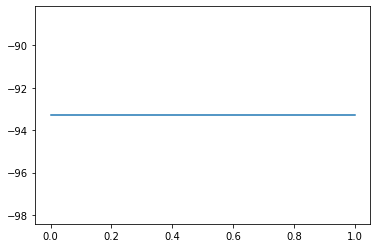

In [ ]:
total=[] # Для построения графика
n = 5 # популяция
nsurv = 3 # количество выживших
nnew = n-nsurv # количество новых
epohs = 2 # количество эпох
mut = 0.2 # коэфициент мутаций
# curr_time = time.time()

for it in range(epohs): # создали список списков всех значений по эпохам
  val, stScaler = countValue(popul) # считаем успех каждого из ботов
  
  newpopul, sval = getSurvPopul(popul, val, nsurv, 1) # получили популяцию выживших, нас интересует бот с максимальным успехом, поэтому reverse = 1
  del popul
  del val
  # print(it, time.time() - curr_time, " ", sval[0:3]) # Выводим время на операцию, среднее значение и 20 лучших ботов  
  total.append(sval[0]) # заносим самого лучшего бота в список для построения графика эволюции
  del sval
  curr_time = time.time() # Обновляем текущее время
  print(newpopul.shape)
  # проходимся по новой популяции
  for k in range(nnew):

    # вытаскиваем новых родителей
    botp1, botp2 = getParents(newpopul, nsurv) 
    print(botp1.shape)
    # print()
    newbot = [] # здесь будет новый бот

    # for k in range()

    for j in range(len(botp1)): # боты-родители одинаковой длины, будем проходиться по каждому элементу родителя
      x = crossPointFrom2Parents(botp1, botp2,j) # скрещиваем
      # print(x.shape)
      if random.random()<mut:
          x[0] = x[0] * (-1)
      for t in range(1,3):
        if random.random()<mut:
          x[t] = x[t] + random.random()
      newbot.append(x) # закидываем элемент в бота
      del x
    newpopul = np.vstack((newpopul, np.expand_dims(np.array(newbot), axis=0))) # добавляем бота
    del newbot
  popul = newpopul # вывести список на эпоху
  del newpopul
  popul = np.array(popul) # для того, чтобы можно было легко вытащить индексы условием, преобразуем в numpy массив
plt.plot(total)
print(np.mean(total)) 

In [ ]:
stScaler.transform()

MinMaxScaler(copy=True, feature_range=(-1, 1))

In [ ]:
val,_ = countValue(popul) # считаем успех каждого из ботов
newpopul, sval = getSurvPopul(popul, val, nsurv, 1) # получили популяцию выживших, нас интересует бот с максимальным успехом, поэтому reverse = 1

Track generation: 1143..1442 -> 299-tiles track
Track generation: 1143..1442 -> 299-tiles track
Track generation: 1143..1442 -> 299-tiles track
Track generation: 1143..1442 -> 299-tiles track
Track generation: 1143..1442 -> 299-tiles track
Track generation: 1143..1442 -> 299-tiles track
[]


In [ ]:
env.close()
env = wrap_env(env) # оборачиваем наше окружения для записи видео
env.seed(0) # симуляция одного и того же окружения
observation = env.reset() # обнуляем вектор наблюдения
i=0
action = [ 0.0, 1.0, 0.0 ]
scaler = MinMaxScaler()
min_f = 0
max_f = 0
mean_f = 0
trigger = 0
done = 0
while done!=True:
  observation,reward,done,_ = env.step(action) # остлеживаем все параметры для подсчета функции значения
  del action
  # result = observation*bot # матрично перемножаем бота и вектор наблюдения для предсказания следующего движения
  result = np.dot(observation.reshape((1,96*96*3)) , newpopul[0])
  del observation
  if not trigger:
    min_f = result[0][0]
    max_f = result[0][0]
    mean_f = result[0][0]
    first = 0
    trigger = 1
  else:
  # first_list.append(result[0][0])
    if result[0][0] > max_f:
      max_f = result[0][0]
      first = 1
    elif result[0][0] < min_f:
      min_f = result[0][0]
      first = -1
    else:
      first = 0
  # stScaler.fit(np.array(first_list).reshape((-1,1)))
  # first = stScaler.transform(result[0].reshape((-1,1)))[0]
  others = scaler.fit_transform(result[0].reshape((-1,1))).flatten()[1:]
  action = np.hstack((first, others))
  print(action)
  if done: 
    break;
            
env.close()
show_video()

Track generation: 1143..1442 -> 299-tiles track
[0.         0.88201602 1.        ]
[1.         1.         0.64698622]
[1.         1.         0.26475967]
[1.         1.         0.27296956]
[1.         1.         0.52071988]
[1.         1.         0.10949964]
[0.         1.         0.09928997]
[0. 1. 0.]
[0.         1.         0.13180571]
[0.         1.         0.27672582]
[0.         1.         0.19861074]
[0.        1.        0.4237481]
[0.         1.         0.78257194]
[0.         1.         0.77790544]
[0.         1.         0.49089959]
[0.         1.         0.33930328]
[0.        1.        0.4353951]
[0.         1.         0.56532089]
[0.         1.         0.38138832]
[0.        1.        0.6713371]
[0.         1.         0.40911774]
[0.         1.         0.38879051]
[0.        1.        0.5177715]
[0.         1.         0.57545386]
[0.         1.         0.37585194]
[0.         1.         0.62305785]
[0.         1.         0.26286436]
[0.         1.         0.35875371]
[0.     

In [ ]:
env.close()
env = wrap_env(env) # оборачиваем наше окружения для записи видео
env.seed(0) # симуляция одного и того же окружения
observation = env.reset() # обнуляем вектор наблюдения
i=0
action = [ 0.0, 1.0, 0.0 ]
scaler = MinMaxScaler()
while True:

    env.render() # Рендер окружения
    # В качестве действия будем подавать значения нашего лучшего бота
    # action = env.action_space.sample()
    observation,reward,done,_ = env.step(action) # остлеживаем все параметры для подсчета функции значения
    # print(popul[np.random.randint(0, numBots-1)].shape)
    result = np.dot(observation.reshape((1,96*96*3)) , newpopul[0])
    print(result)
    action = scaler.fit_transform(result[0].reshape((-1,1))).flatten()
    print(action)
    if done: 
      break;
            
env.close()
show_video()

Track generation: 1143..1442 -> 299-tiles track
[[828119.65443531 824358.67991337 823338.28620431]]
[1.        0.2134104 0.       ]
[[1197431.74853401 1197712.88680482 1196945.56906618]]
[0.63360906 1.         0.        ]
[[1407646.22075304 1405238.50787599 1405355.24265478]]
[1.         0.         0.04848368]
[[1579908.93323661 1582278.34346126 1582694.0029265 ]]
[0.         0.85075438 1.        ]
[[1649518.75094764 1656409.42531268 1654187.43011642]]
[0.         1.         0.67753589]
[[1646464.43519611 1654616.03721467 1650702.21221108]]
[0.         1.         0.51987045]
[[1641733.12622932 1649559.36130634 1645557.18933137]]
[0.         1.         0.48862104]
[[1637156.14477478 1641344.7781584  1639189.49187996]]
[0.         1.         0.48544404]
[[1634390.42182897 1638098.75316933 1636680.03838685]]
[0.         1.         0.61742502]
[[1630791.7723511  1635104.59156206 1634706.28472301]]
[0.         1.         0.90764583]
[[1624564.14949232 1629280.14239115 1627714.22989465]]
[0.

In [ ]:
env.close()
env = wrap_env(env) # оборачиваем наше окружения для записи видео
env.seed(0) # симуляция одного и того же окружения
observation = env.reset() # обнуляем вектор наблюдения
i=0
action = [ 0.0, 1.0, 0.0 ]
scaler = MinMaxScaler()
while True:

    env.render() # Рендер окружения
    # В качестве действия будем подавать значения нашего лучшего бота
    # action = env.action_space.sample()
    observation,reward,done,_ = env.step(action) # остлеживаем все параметры для подсчета функции значения
    # print(popul[np.random.randint(0, numBots-1)].shape)
    result = np.dot(observation.reshape((1,96*96*3)) , newpopul[0])
    print(result)
    action = scaler.fit_transform(result[0].reshape((-1,1))).flatten()
    print(action)
    if done: 
      break;
            
env.close()
show_video()

Track generation: 1143..1442 -> 299-tiles track
[[828119.65443531 824358.67991337 823338.28620431]]
[1.        0.2134104 0.       ]
[[1197431.74853401 1197712.88680482 1196945.56906618]]
[0.63360906 1.         0.        ]
[[1407646.22075304 1405238.50787599 1405355.24265478]]
[1.         0.         0.04848368]
[[1579908.93323661 1582278.34346126 1582694.0029265 ]]
[0.         0.85075438 1.        ]
[[1649518.75094764 1656409.42531268 1654187.43011642]]
[0.         1.         0.67753589]
[[1646464.43519611 1654616.03721467 1650702.21221108]]
[0.         1.         0.51987045]
[[1641733.12622932 1649559.36130634 1645557.18933137]]
[0.         1.         0.48862104]
[[1637156.14477478 1641344.7781584  1639189.49187996]]
[0.         1.         0.48544404]
[[1634390.42182897 1638098.75316933 1636680.03838685]]
[0.         1.         0.61742502]
[[1630791.7723511  1635104.59156206 1634706.28472301]]
[0.         1.         0.90764583]
[[1624564.14949232 1629280.14239115 1627714.22989465]]
[0.

In [ ]:
env.close()
env = wrap_env(env) # оборачиваем наше окружения для записи видео
env.seed(0) # симуляция одного и того же окружения
observation = env.reset() # обнуляем вектор наблюдения
i=0
action = [ 0.0, 1.0, 0.0 ]
scaler = MinMaxScaler()
while True:

    env.render() # Рендер окружения
    # В качестве действия будем подавать значения нашего лучшего бота
    # action = env.action_space.sample()
    observation,reward,done,_ = env.step(action) # остлеживаем все параметры для подсчета функции значения
    # print(popul[np.random.randint(0, numBots-1)].shape)
    result = np.dot(observation.reshape((1,96*96*3)) , newpopul[0])
    print(result)
    action = scaler.fit_transform(result[0].reshape((-1,1))).flatten()
    print(action)
    if done: 
      break;
            
env.close()
show_video()

Track generation: 1143..1442 -> 299-tiles track
[[840863.10817626 847014.41251299 844255.63875496]]
[0.         1.         0.55151402]
[[1220352.53590166 1223194.22647921 1222027.49779932]]
[0.         1.         0.58942445]
[[1430074.47483551 1436371.21285712 1436973.34689495]]
[0.         0.91271993 1.        ]
[[1606028.09744923 1610871.91146052 1611078.416575  ]]
[0.         0.95911048 1.        ]
[[1684871.22974968 1689870.01128526 1688715.17945802]]
[0.         1.         0.76897734]
[[1685268.56089867 1689356.80767449 1687874.53725088]]
[0.         1.         0.63743127]
[[1678302.16430514 1684333.71620852 1681534.98898299]]
[0.         1.         0.53598555]
[[1672353.50130376 1677984.96668575 1674826.54773043]]
[0.         1.         0.43914794]
[[1668906.28689301 1674607.42546798 1671712.19615251]]
[0.         1.         0.49216647]
[[1664978.5354823  1670945.98936919 1668450.64147484]]
[0.         1.         0.58184044]
[[1659229.32113639 1667739.21078493 1664966.38537792]]
